### **Kaggle Username : Esraa Mahmoud**





# Problem Formulation

>**The problem:** 

 we need to estimate how likely people will like a product, without actually listing out on the website by predicting  the product ratings given the other features known for a product on Wish.com because the higher the rating is, the more the customers like the product.

>**input:**

a tabular dataset which is wish.com product dataset.

>**output:**

a model that predict the product rating based on other features.

>**Data Minning Function**

Calssificaion as we are going to predict the product rating and assign it to a rating from 1 to 5

>**The challanges could be**

Data cleaning, dealing with missing data, model selection, model complexity,feature selection, irrelevant features, Not enough training data, Nonrepresentative training data, data imbalance, overfitting or underfitting.


> **The impact:**

If you understand customer prefrences, you can increase your sales by providing them with what they really desire and you can avoid undesired products that may cost you more effort to sell them. And it also provide the business owner with their customer segmentations so they can expect where most of their profits come from.



> **The ideal solution**

is to select design a machine learning model that suits the data to classify the products accurately to the right class without being biased and with the minimal number of misclassification.

# Loading data

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None) # to display all columns
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [4]:
train_data = pd.read_csv('train_new.csv')
train_data

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,S,50,Livraison standard,1,0,41,50,NaN,NaN,CN,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",NaN,H01,31,Livraison standard,2,0,35,50,NaN,NaN,CN,zzbllss,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,50,Livraison standard,3,0,25,50,NaN,NaN,CN,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,M,50,Livraison standard,2,0,45,50,1.0,Quantité limitée !,CN,yubenqiang,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


# Data exploration

In [5]:
train_data.shape

(1094, 34)

In [6]:
train_data.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'theme', 'crawl_month', 'id'],
      dtype='object')

In [7]:
train_data.dtypes

price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner              float64
urgency_text                     object
origin_country                   object
merchant_title                   object
merchant_name                    object


In [8]:
train_data['theme'].value_counts()

summer    1094
Name: theme, dtype: int64

In [9]:
train_data['origin_country'].value_counts()

CN    1054
US      22
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

In [10]:
train_data['inventory_total'].value_counts()

50    1089
1        1
9        1
37       1
2        1
36       1
Name: inventory_total, dtype: int64

In [11]:
train_data['shipping_is_express'].value_counts()

0    1091
1       3
Name: shipping_is_express, dtype: int64

In [12]:
train_data['shipping_option_name'].value_counts()

Livraison standard         1047
Standard Shipping            16
Envio Padrão                  6
الشحن القياسي                 4
Expediere Standard            4
Envío normal                  3
Standardversand               3
Livraison Express             3
Standardowa wysyłka           2
Standart Gönderi              2
Стандартная доставка          2
Spedizione standard           1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

In [13]:
train_data['currency_buyer'].value_counts()


EUR    1094
Name: currency_buyer, dtype: int64

In [14]:
train_data['crawl_month'].value_counts()


2020-08    1094
Name: crawl_month, dtype: int64

so the columns 'theme', 'crawl_month' and 'currency_buyer' are irrelevant features and doen't have an impact on the rating as they have the same value for all data samples



In [15]:
# Filtering out unnecessary columns
train = train_data[['price', 'retail_price', #'currency_buyer',
                    'units_sold', 'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
                    'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
                    'tags','product_color', 'product_variation_size_id',
                    'product_variation_inventory', 'shipping_option_name',
                    'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
                    'inventory_total','has_urgency_banner', 'urgency_text',
                    'origin_country', 'merchant_title', 'merchant_name',
                    'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
                    #'merchant_id',
                    'merchant_has_profile_picture','merchant_profile_picture' #'theme',
                    #'crawl_month'
                    #'id'
                  ]]

In [16]:
train

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture,merchant_profile_picture
0,8.00,7,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...
1,8.00,7,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,0,NaN
2,6.00,34,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,0,NaN
3,4.67,4,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,0,NaN
4,8.00,11,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,S,50,Livraison standard,1,0,41,50,NaN,NaN,CN,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,0,NaN
1090,5.00,5,1000,0,5.0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",NaN,H01,31,Livraison standard,2,0,35,50,NaN,NaN,CN,zzbllss,zzbllss,"(2,904 notes)",2904,4.422521,0,NaN
1091,9.00,48,1000,1,4.0,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,50,Livraison standard,3,0,25,50,NaN,NaN,CN,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,0,NaN
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,M,50,Livraison standard,2,0,45,50,1.0,Quantité limitée !,CN,yubenqiang,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,0,NaN


In [17]:
train.shape

(1094, 29)

In [18]:
train.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'merchant_profile_picture'],
      dtype='object')

In [19]:
# Missing value check
train.isna().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating                   0
merchant_has_profile_picture

so it seems that most of the data has null values in the columns 'has_urgency_banner','urgency_text' and 'merchant_profile_picture' so it would be better to drop them based on the percent missing value technique.
we also have few null values in other columns that we have to deal with them later 

In [20]:
train.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000


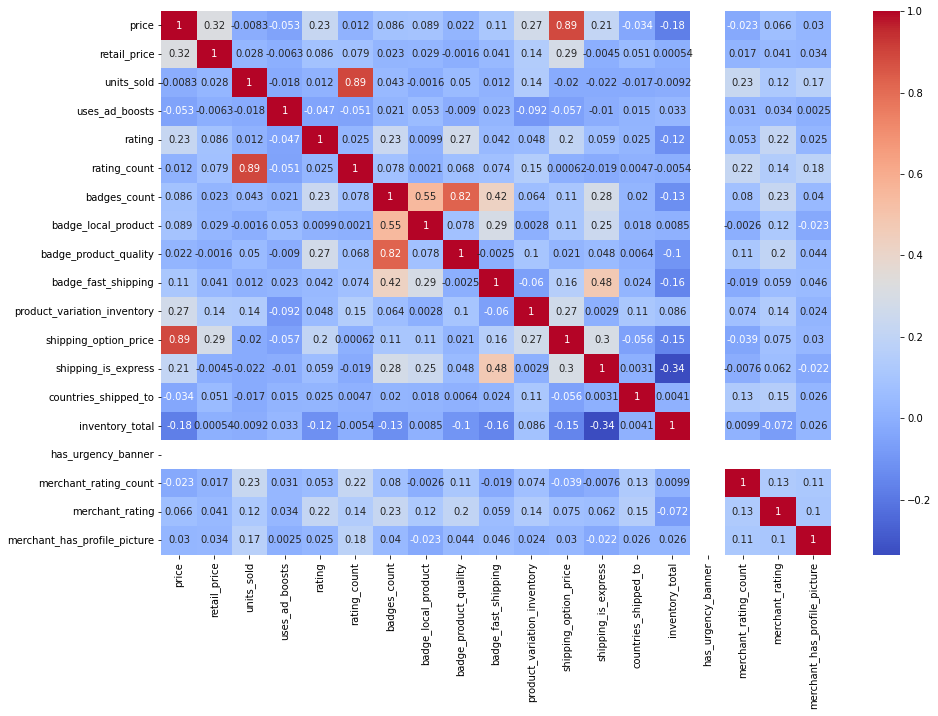

In [21]:
# Featrue correlation
fig_dim = (15,10)
fig,ax = plt.subplots(figsize=fig_dim)
sn.heatmap(train.corr(),ax=ax,annot=True,cmap='coolwarm')
plt.show()


most relevant with rating = merchant rating, shipping option price,badge product quality, badges count

the irrelevant features are 'has_urgency_banner','urgency_text', 'merchant_profile_picture', 'tags', 'shipping_option_name','merchant_title','merchant_name' and 'merchant_info_subtitle'


shipping is express , inventory total 

In [22]:
# Filtering out unnecessary columns
train_new = train[['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', #'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', #'tags',
       'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       #'shipping_option_name',
        'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', #'has_urgency_banner',
       #'urgency_text', 
       'origin_country', #'merchant_title', 'merchant_name',
       #'merchant_info_subtitle', 
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', #'merchant_profile_picture'
       ]]

In [23]:
train_new

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.00,7,10000,1,4.0,1670,0,0,0,yellow,M,50,3,0,30,50,CN,66644,4.137582,1
1,8.00,7,1000,0,4.0,843,1,0,0,black,L,50,3,0,37,50,CN,25752,4.256873,0
2,6.00,34,100,0,4.0,10,0,0,0,white,L,50,2,0,41,50,CN,3897,3.928920,0
3,4.67,4,100,1,3.0,82,0,0,0,lakeblue,XS,5,1,0,25,50,CN,7497,4.079365,0
4,8.00,11,1000,0,4.0,127,0,0,0,apricot,S,50,3,0,15,50,CN,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,red,S,50,1,0,41,50,CN,230951,4.311066,0
1090,5.00,5,1000,0,5.0,377,1,1,0,NaN,H01,31,2,0,35,50,CN,2904,4.422521,0
1091,9.00,48,1000,1,4.0,135,0,0,0,purple,M,50,3,0,25,50,CN,6632,3.748794,0
1092,11.00,10,10000,1,4.0,1479,0,0,0,black,M,50,2,0,45,50,CN,5816,3.936382,0


In [24]:
abs(train_new.corr()['rating'])

price                           0.226129
retail_price                    0.086251
units_sold                      0.011729
uses_ad_boosts                  0.047359
rating                          1.000000
rating_count                    0.025344
badges_count                    0.234001
badge_product_quality           0.273749
badge_fast_shipping             0.042029
product_variation_inventory     0.048443
shipping_option_price           0.202719
shipping_is_express             0.059141
countries_shipped_to            0.024565
inventory_total                 0.116458
merchant_rating_count           0.052712
merchant_rating                 0.216270
merchant_has_profile_picture    0.025481
Name: rating, dtype: float64

it seems that the features that have the highest impact on the rating are:
*   badge_product_quality
*   badges_count
*   price
*   merchant_rating
*   shipping_option_price
*   inventory_total
*   retail_price
*   shipping_is_express
*   merchant_rating_count
*   product_variation_inventory
*   uses_ad_boosts
*   badge_fast_shipping
*   rating_count




array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'retail_price'}>,
        <Axes: title={'center': 'units_sold'}>,
        <Axes: title={'center': 'uses_ad_boosts'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'rating_count'}>,
        <Axes: title={'center': 'badges_count'}>,
        <Axes: title={'center': 'badge_product_quality'}>],
       [<Axes: title={'center': 'badge_fast_shipping'}>,
        <Axes: title={'center': 'product_variation_inventory'}>,
        <Axes: title={'center': 'shipping_option_price'}>,
        <Axes: title={'center': 'shipping_is_express'}>],
       [<Axes: title={'center': 'countries_shipped_to'}>,
        <Axes: title={'center': 'inventory_total'}>,
        <Axes: title={'center': 'merchant_rating_count'}>,
        <Axes: title={'center': 'merchant_rating'}>],
       [<Axes: title={'center': 'merchant_has_profile_picture'}>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

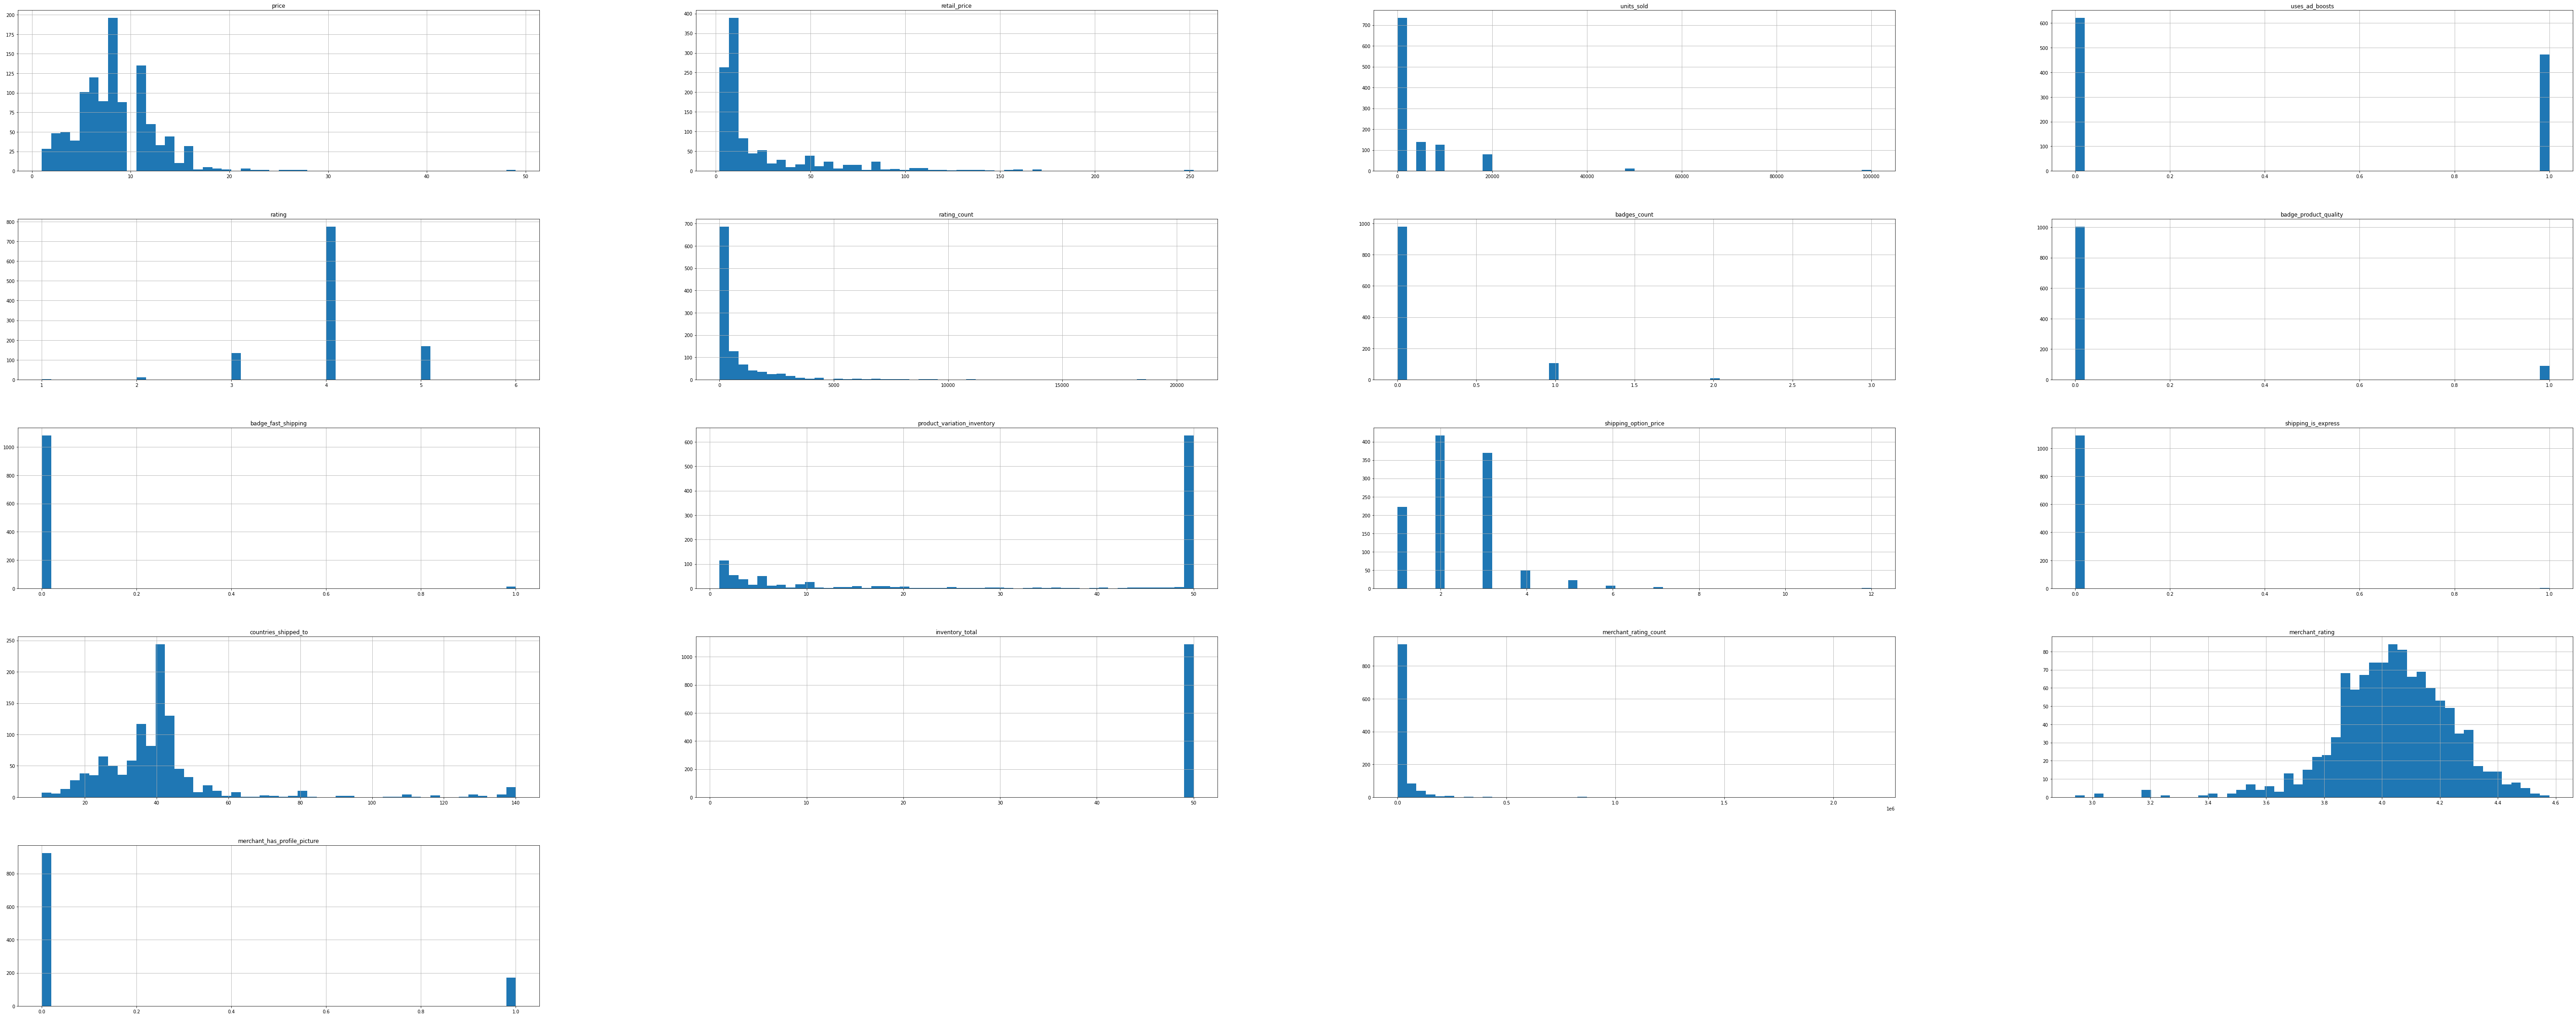

In [25]:
# outliers and noise check 
train_new.hist(bins=50,figsize=(100,40))


<Axes: >

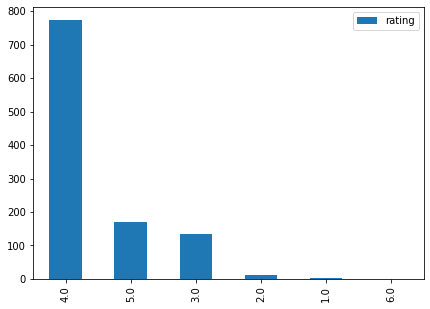

In [26]:
pd.DataFrame(train_new['rating'].value_counts()).plot(kind='bar',figsize=(7,5))

it's not reasonable to have rating = 6, as rating ranges from 1 to 5

In [27]:
rate_6 =train_new[train_new['rating']==6.0]
rate_6

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
971,49.0,42,100,0,6.0,6,1,0,1,Rose red,XXXXXL,2,12,1,41,2,CN,29977,4.223138,0


it's only one row so it's better to remove it 🤡

<Axes: >

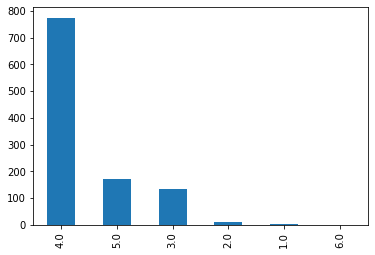

In [28]:
# check data balance
train_new['rating'].value_counts().plot(kind = 'bar')

# Data Cleaning

In [117]:
# dropping the row with the noise value 
train_new.drop(971,inplace=True)
train_new.reset_index(inplace=True)

<ipython-input-117-4e36532e3d00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new.drop(971,inplace=True)


In [118]:
rate_6 =train_new[train_new['rating']==6.0]
rate_6

,index,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture


In [119]:
train_new.shape

(1093, 21)

In [120]:
train_new.isna().sum()

index                           0
price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

In [121]:
# Filling Missing Values
train_new.fillna('unknown', inplace=True)

<ipython-input-121-c2eef392c311>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new.fillna('unknown', inplace=True)


In [122]:
train_new.isna().sum()

index                           0
price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

# Data Preprocessing

In [34]:
train_new

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.00,7,10000,1,4.0,1670,0,0,0,yellow,M,50,3,0,30,50,CN,66644,4.137582,1
1,8.00,7,1000,0,4.0,843,1,0,0,black,L,50,3,0,37,50,CN,25752,4.256873,0
2,6.00,34,100,0,4.0,10,0,0,0,white,L,50,2,0,41,50,CN,3897,3.928920,0
3,4.67,4,100,1,3.0,82,0,0,0,lakeblue,XS,5,1,0,25,50,CN,7497,4.079365,0
4,8.00,11,1000,0,4.0,127,0,0,0,apricot,S,50,3,0,15,50,CN,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,red,S,50,1,0,41,50,CN,230951,4.311066,0
1090,5.00,5,1000,0,5.0,377,1,1,0,unknown,H01,31,2,0,35,50,CN,2904,4.422521,0
1091,9.00,48,1000,1,4.0,135,0,0,0,purple,M,50,3,0,25,50,CN,6632,3.748794,0
1092,11.00,10,10000,1,4.0,1479,0,0,0,black,M,50,2,0,45,50,CN,5816,3.936382,0


In [35]:
from sklearn import preprocessing

In [36]:
# Encode text columns with values
encoder = preprocessing.LabelEncoder()
train_new['product_color'] = encoder.fit_transform(train_new['product_color'])
train_new['product_variation_size_id'] = encoder.fit_transform(train_new['product_variation_size_id'])
train_new['origin_country'] = encoder.fit_transform(train_new['origin_country'])

<ipython-input-36-6370d067715a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['product_color'] = encoder.fit_transform(train_new['product_color'])
<ipython-input-36-6370d067715a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['product_variation_size_id'] = encoder.fit_transform(train_new['product_variation_size_id'])
<ipython-input-36-6370d067715a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [37]:
train_new

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.00,7,10000,1,4.0,1670,0,0,0,87,38,50,3,0,30,50,0,66644,4.137582,1
1,8.00,7,1000,0,4.0,843,1,0,0,12,37,50,3,0,37,50,0,25752,4.256873,0
2,6.00,34,100,0,4.0,10,0,0,0,78,37,50,2,0,41,50,0,3897,3.928920,0
3,4.67,4,100,1,3.0,82,0,0,0,40,72,5,1,0,25,50,0,7497,4.079365,0
4,8.00,11,1000,0,4.0,127,0,0,0,8,43,50,3,0,15,50,0,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,68,43,50,1,0,41,50,0,230951,4.311066,0
1090,5.00,5,1000,0,5.0,377,1,1,0,75,36,31,2,0,35,50,0,2904,4.422521,0
1091,9.00,48,1000,1,4.0,135,0,0,0,66,38,50,3,0,25,50,0,6632,3.748794,0
1092,11.00,10,10000,1,4.0,1479,0,0,0,12,38,50,2,0,45,50,0,5816,3.936382,0


# Data Splitting

##Data separation as x and y

In [123]:
y = train_new['rating']
y

0       4.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
1088    4.0
1089    5.0
1090    4.0
1091    4.0
1092    3.0
Name: rating, Length: 1093, dtype: float64

In [40]:
x = train_new.drop('rating',axis=1)
x

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.00,7,10000,1,1670,0,0,0,87,38,50,3,0,30,50,0,66644,4.137582,1
1,8.00,7,1000,0,843,1,0,0,12,37,50,3,0,37,50,0,25752,4.256873,0
2,6.00,34,100,0,10,0,0,0,78,37,50,2,0,41,50,0,3897,3.928920,0
3,4.67,4,100,1,82,0,0,0,40,72,5,1,0,25,50,0,7497,4.079365,0
4,8.00,11,1000,0,127,0,0,0,8,43,50,3,0,15,50,0,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,2150,0,0,0,68,43,50,1,0,41,50,0,230951,4.311066,0
1090,5.00,5,1000,0,377,1,1,0,75,36,31,2,0,35,50,0,2904,4.422521,0
1091,9.00,48,1000,1,135,0,0,0,66,38,50,3,0,25,50,0,6632,3.748794,0
1092,11.00,10,10000,1,1479,0,0,0,12,38,50,2,0,45,50,0,5816,3.936382,0


## split data into train and test

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,shuffle=True)

In [43]:
x_train

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
228,1.00,8,50,0,4,0,0,0,78,75,1,1,0,39,50,0,47,4.170213,0
154,7.00,6,1000,1,207,0,0,0,36,41,50,2,0,36,50,0,4425,4.332429,1
100,11.00,19,20000,1,2729,0,0,0,71,43,50,2,0,41,50,0,4336,4.003229,0
1092,11.00,10,10000,1,1479,0,0,0,12,38,50,2,0,45,50,0,5816,3.936382,0
721,5.78,9,100,1,28,0,0,0,12,72,14,2,0,43,50,0,33855,3.917353,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,12.00,13,1000,0,215,0,0,0,61,43,50,3,0,40,50,0,15076,4.084969,0
993,5.92,9,100,1,17,0,0,0,18,72,18,1,0,43,50,0,5106,4.212887,0
608,5.84,5,100,0,24,0,0,0,36,72,2,1,0,25,50,0,9470,3.956811,0
928,13.00,11,100,0,9,0,0,0,7,65,50,3,0,41,50,0,111,3.801802,0


In [44]:
x_test

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
788,11.0,10,100,0,3,0,0,0,18,19,3,2,0,42,50,0,299,4.247492,0
751,8.0,7,10000,0,951,0,0,0,78,72,50,2,0,31,50,0,4213,4.058391,0
923,5.0,5,1000,1,435,0,0,0,78,38,50,1,0,39,50,0,3883,4.288179,0
530,2.0,10,100,0,10,0,0,0,78,75,1,1,0,41,50,0,8225,3.990638,0
748,16.0,14,100,1,82,0,0,0,78,43,50,5,0,36,50,0,514,4.217899,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,8.0,7,1000,0,233,0,0,0,61,72,1,2,0,26,50,0,32858,3.885538,0
959,8.0,8,10000,0,1858,1,1,0,73,43,50,3,0,41,50,0,19879,3.994718,0
540,13.0,11,100,0,2,0,0,0,78,57,36,3,0,29,50,0,31,3.774194,0
363,8.0,11,100,0,21,0,0,0,85,43,50,2,0,17,50,0,31,3.580645,0


# Test Data Preprocessing

In [45]:
# load Data
test = pd.read_csv('test_new.csv')
_id = test['id']
test

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,XS,5,Livraison standard,2,0,139,50,NaN,NaN,CN,liyang163,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,XS,50,Livraison standard,2,0,31,50,NaN,NaN,CN,singing the song,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,XS,20,Livraison standard,2,0,41,50,NaN,NaN,CN,Surper boutique,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,M,50,Livraison standard,5,0,42,50,NaN,NaN,CN,postonny,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,M,50,Livraison standard,3,0,38,50,NaN,NaN,CN,fashionforgirls,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,EUR,100,1,27,0,0,0,0,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",black,M,50,Livraison standard,4,0,35,50,NaN,NaN,VE,HERNADEZYELI,hernadezyeli,70 % avis positifs (572 notes),572,3.367133,5dc818ca030a154e48a3a8af,0,NaN,summer,2020-08,1166
475,6.00,17,EUR,5000,1,817,0,0,0,0,"blouse,Summer,Vest,Plus Size,letter print,cute...",blue,XXS,1,Livraison standard,2,0,41,50,NaN,NaN,CN,First Crush,firstcrush,"87 % avis positifs (50,864 notes)",50864,4.079644,587f85cbb8038f4cb049c56c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,1416
476,4.83,51,EUR,50,1,1,0,0,0,0,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",white,XS,3,Livraison standard,1,0,39,50,1.0,Quantité limitée !,VE,saulstore,saulstore,85 % avis positifs (57 notes),57,3.824561,5e3c5fbfe217d492138970c1,0,NaN,summer,2020-08,63
477,3.00,3,EUR,100,1,8,0,0,0,0,"Summer,slideslipper,Sandals,fur,Indoor,Fox,Ind...",black,34,3,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,lkwelyly,hey1827,"87 % avis positifs (1,086 notes)",1086,4.056169,5c6d6c28619caa1d94891d06,0,NaN,summer,2020-08,626


In [46]:
# Filtering out unnecessary columns
test_new = test[['price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating_count', 'badges_count', #'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', #'tags',
       'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       #'shipping_option_name',
        'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', #'has_urgency_banner',
       #'urgency_text', 
       'origin_country', #'merchant_title', 'merchant_name',
       #'merchant_info_subtitle', 
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', #'merchant_profile_picture'
       ]]

In [47]:
# Filling Missing Values
test_new.fillna('unknown', inplace=True)

<ipython-input-47-bca41d3257ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_new.fillna('unknown', inplace=True)


In [48]:
# Encode text columns with values
encoder = preprocessing.LabelEncoder()
test_new['product_color'] = encoder.fit_transform(test_new['product_color'])
test_new['product_variation_size_id'] = encoder.fit_transform(test_new['product_variation_size_id'])
test_new['origin_country'] = encoder.fit_transform(test_new['origin_country'])

<ipython-input-48-8f9e427cacae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_new['product_color'] = encoder.fit_transform(test_new['product_color'])
<ipython-input-48-8f9e427cacae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_new['product_variation_size_id'] = encoder.fit_transform(test_new['product_variation_size_id'])
<ipython-input-48-8f9e427cacae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [49]:
test_new

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,5.75,5,10,1,0,0,0,0,51,41,5,2,0,139,50,1,3,2.333333,0
1,7.00,7,5000,0,579,0,0,0,5,41,50,2,0,31,50,1,4213,4.058391,0
2,5.00,16,1000,1,62,0,0,0,8,41,20,2,0,41,50,1,10501,4.029235,0
3,18.00,27,5000,1,1903,0,0,0,8,21,50,5,0,42,50,1,15855,4.052917,0
4,12.00,81,20000,0,1799,0,0,0,51,21,50,3,0,38,50,1,151914,4.127921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,0,5,21,50,4,0,35,50,3,572,3.367133,0
475,6.00,17,5000,1,817,0,0,0,8,44,1,2,0,41,50,1,50864,4.079644,1
476,4.83,51,50,1,1,0,0,0,51,41,3,1,0,39,50,3,57,3.824561,0
477,3.00,3,100,1,8,0,0,0,5,9,3,1,0,26,50,1,1086,4.056169,0


# Model Building

## Decision Tree

### Trial 0 

In [50]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier()

In [51]:
# Fit classifier to training set
DT_clf = DT_clf.fit(x_train,y_train)

In [52]:
# make predictions on test set
predictions = DT_clf.predict(x_test)
predictions

array([4., 4., 4., 3., 5., 4., 5., 4., 4., 5., 4., 2., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 5., 4., 5., 5., 3., 4., 4., 4., 3., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 5., 4., 3., 3., 3., 5., 4., 5., 5.,
       4., 4., 5., 4., 5., 3., 4., 4., 3., 3., 4., 4., 4., 4., 3., 4., 4.,
       4., 4., 4., 4., 5., 3., 4., 4., 4., 4., 4., 4., 5., 3., 5., 4., 4.,
       3., 4., 4., 3., 2., 4., 3., 4., 4., 4., 5., 5., 3., 5., 4., 4., 4.,
       3., 4., 4., 4., 4., 3., 3., 4.])

In [53]:
# Performance Metrics
from sklearn.metrics import f1_score,accuracy_score

In [54]:
# score on test split
f1_score(y_test,predictions,average='weighted')

0.7041297495842951

In [55]:
# prediction on train
pred = DT_clf.predict(x_train)

In [56]:
# Train score
f1_score(y_train,pred,average='weighted')

0.9949358263586884

There is a huge overfitting here !
 
 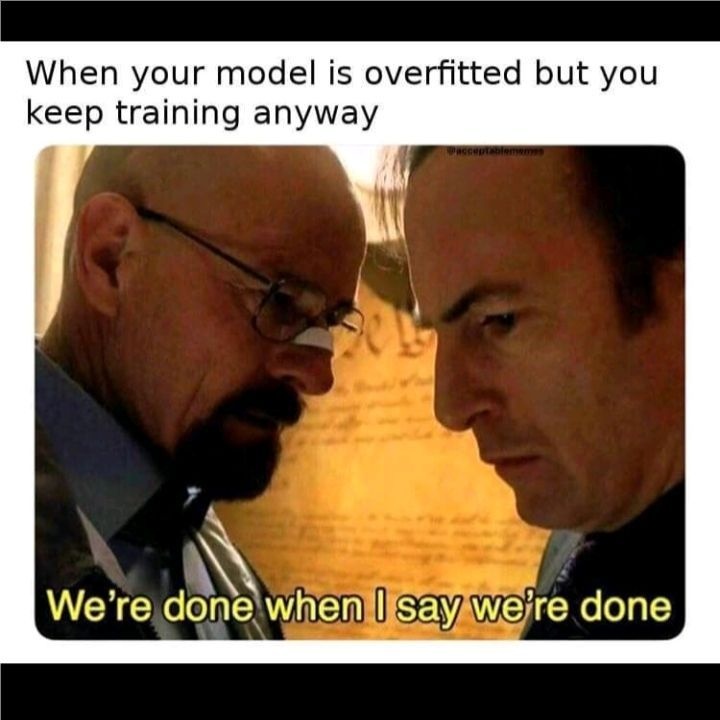

**thoughts and observations for trial 0:** 

the decision tree is overfitting so we need some pruning

**plan for trial 1:**

setting the hyperparameters of the decision tree model including `max_depth`, `min_samples_leaf` can be tuned to early stop the growth of the tree and prevent the model from overfitting, so i will set it intially with `max_depth` =10, `min_samples_leaf`=25

### Trial 1

In [124]:
# Fit classifier to training set
DT_clf1 = DecisionTreeClassifier(max_depth=10,min_samples_leaf=25)
DT_clf1 = DT_clf1.fit(x_train,y_train)

In [58]:
#prediction on test split
predictions1 = DT_clf1.predict(x_test)
predictions1

array([4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 5., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 3., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4.,
       4., 3., 4., 3., 4., 4., 4., 4., 4., 4., 5., 4., 3., 5., 3., 4., 4.,
       4., 4., 4., 4., 4., 5., 3., 4.])

In [59]:
# Test score
f1_score(y_test,predictions1,average='weighted')

0.7426350364149407

In [60]:
#prediction on train
pred1 = DT_clf1.predict(x_train)
# Train score
f1_score(y_train,pred1,average='weighted')

0.7451119420171345

Is this underfitting ?

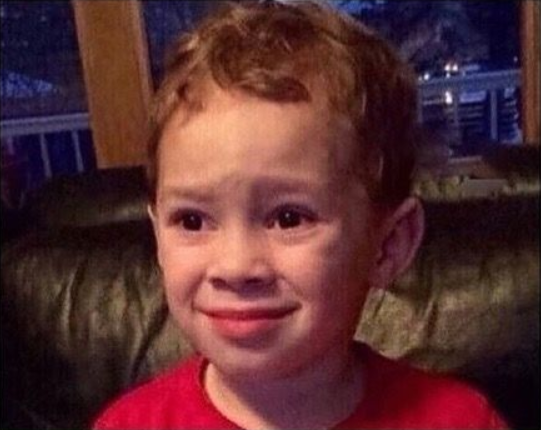

**thoughts and observations for trial 1:** 

the decision tree is underfitting so we need to change hyperparameter values

**plan for trial 2:**

change the `max_depth` to 15 and remove `min_samples_leaf` 

### Trial 2

In [61]:
DT_clf2 = DecisionTreeClassifier(max_depth=15)

In [62]:
DT_clf2 = DT_clf2.fit(x_train,y_train)
predictions2= DT_clf2.predict(x_test)
predictions2

array([5., 4., 4., 3., 5., 4., 5., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 5., 4., 5., 5., 3., 3., 4., 4., 3., 4., 4.,
       4., 4., 5., 4., 5., 4., 4., 4., 5., 4., 4., 3., 3., 5., 4., 4., 5.,
       4., 4., 5., 4., 4., 3., 4., 4., 3., 3., 4., 4., 4., 4., 3., 4., 4.,
       4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 5., 3., 4., 4., 4.,
       3., 4., 4., 3., 2., 3., 4., 4., 4., 4., 5., 5., 3., 5., 4., 4., 4.,
       3., 4., 4., 4., 4., 3., 3., 4.])

In [63]:
f1_score(y_test,predictions2,average='weighted')

0.711139156554746

In [64]:
pred2 = DT_clf2.predict(x_train)
f1_score(y_train,pred2,average='weighted')

0.9640281092584866

**thoughts and observations for trial 2:** 

the decision tree is overfitting so we need to change hyperparameter values

**plan for trial 3:**

hyperparameter tuning so that it get the best hyperparameters by searching all values

### Trial 3

#### hyperparameter tuning

In [65]:
# Hyperparameter Tunning
DT_clf3 = DecisionTreeClassifier()
param_grid = {"max_depth" :np.arange(1,15,2),"min_samples_split":np.arange(1,30,2)}   
grid = GridSearchCV(estimator=DT_clf3, param_grid = param_grid, n_jobs= -1, scoring='f1_weighted') 
grid.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13]),
                         'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             scoring='f1_weighted')

In [66]:
# Optimal Hyperparameters
print('Mean cross-validated score ',grid.best_score_)
print('Parameter setting that gave the best results on the hold out data',grid.best_params_)

Mean cross-validated score  0.7458515135922521
Parameter setting that gave the best results on the hold out data {'max_depth': 9, 'min_samples_split': 25}


In [67]:
DT_clf3 = DecisionTreeClassifier(max_depth=7,min_samples_split=29)

In [68]:
DT_clf3 = DT_clf3.fit(x_train,y_train)
predictions3= DT_clf3.predict(x_test)
predictions3

array([4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 2., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 5., 4., 5., 4., 4., 4., 4., 4., 2., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 5., 4., 4., 3.,
       4., 4., 3., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 3., 4., 4., 4., 4.,
       4., 3., 5., 3., 4., 4., 4., 4., 4., 4., 5., 5., 3., 5., 3., 4., 4.,
       4., 4., 4., 4., 4., 5., 3., 4.])

In [69]:
#Test score
f1_score(y_test,predictions3,average='weighted')

0.7276479655997727

In [70]:
#Train score
pred3 = DT_clf3.predict(x_train)
f1_score(y_train,pred3,average='weighted')

0.7938752563373633

**thoughts and observations for trial 3:** 

the decision tree is still underfitting so we need to change hyperparameter values

**plan for trial 4:**

hyperparameter tuning the max depth only and remove the min_samples_split

###Trial 4

In [71]:
# Hyperparameter Tunning
# higher value of C = less outliers
DT_clf4 = DecisionTreeClassifier()
param_grid = {"max_depth" :np.arange(1,20,2)}   
grid2 = GridSearchCV(estimator=DT_clf4, param_grid = param_grid, n_jobs= -1, scoring='f1_weighted') 
grid2.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='f1_weighted')

In [72]:
# Optimal Hyperparameters
print('Mean cross-validated score ',grid2.best_score_)
print('Parameter setting that gave the best results on the hold out data',grid2.best_params_)

Mean cross-validated score  0.7414289089224877
Parameter setting that gave the best results on the hold out data {'max_depth': 9}


In [73]:
DT_clf4 = DecisionTreeClassifier(max_depth=11)

In [74]:
DT_clf4 = DT_clf4.fit(x_train,y_train)
predictions4= DT_clf4.predict(x_test)
predictions4

array([5., 4., 4., 4., 5., 4., 5., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 5., 4., 5., 5., 3., 3., 4., 4., 4., 3., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 3., 3., 5., 4., 4., 4.,
       4., 4., 5., 4., 4., 3., 4., 4., 3., 4., 4., 4., 4., 3., 3., 4., 4.,
       4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 5., 3., 5., 4., 4.,
       4., 4., 4., 3., 2., 4., 4., 4., 4., 4., 5., 5., 5., 5., 4., 3., 4.,
       4., 4., 4., 4., 4., 3., 5., 4.])

In [75]:
#Test score
f1_score(y_test,predictions4,average='weighted')

0.701460304401481

In [76]:
# Train score
pred4 = DT_clf4.predict(x_train)
f1_score(y_train,pred4,average='weighted')

0.9231636812584607

still overfitting  😭😭😭😭😭😭

In [77]:
predictions_test= DT_clf4.predict(test_new)

In [78]:
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': predictions_test})

pred_df.to_csv('pred_walkthrough3.csv', index=False)

## SVM 

In [79]:
from sklearn.svm import SVC

In [80]:
from sklearn.preprocessing import StandardScaler

# Data Normalization
scaler = StandardScaler()
scaler.fit(x_train)
xTrain=scaler.transform(x_train)
xTest=scaler.transform(x_test)

### Trial 0

In [81]:
# Run SVM with default hyperparameters (C=1.0, kernel=rbf and gamma=auto )
svc=SVC() 
svc.fit(xTrain,y_train)

SVC()

In [82]:
# make predictions on test set
predections_svc = svc.predict(xTest)

In [83]:
#Test score
f1_score(y_test,predictions3,average='weighted')

0.7276479655997727

In [84]:
# Train score
pred0 = svc.predict(xTrain)
f1_score(y_train,pred0,average='weighted')

0.6867160358999942

**thoughts and observations for trial 0:** 

the model is undefitting 

**plan for trial 1:**

trying different values for svm hyperparameter c=100

###Trial 1

In [85]:
# Run SVM with rbf kernel and C=100.0

svc=SVC(C=100.0) 
# Fit classifier to training set
svc.fit(xTrain,y_train)

SVC(C=100.0)

In [86]:
# make predictions on test split
predections_svc = svc.predict(xTest)


In [87]:

f1_score(y_test,predictions3,average='weighted')


0.7276479655997727

In [88]:
pred0 = svc.predict(xTrain)
f1_score(y_train,pred0,average='weighted')

0.9281384014351127

**thoughts and observations for trial 1:** 

the model is overfitting 

**plan for trial 2:**

search for optimal hyperparameters using grid search

### Hyperparameter Tuning

In [89]:
param_ = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'rbf'], 'probability':[True,False]}
grid_result = GridSearchCV(SVC(), param_grid=param_, refit = True, verbose = 1,scoring='f1_weighted') 
grid_result.fit(xTrain, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf'],
                         'probability': [True, False]},
             scoring='f1_weighted', verbose=1)

###Trial 2

In [92]:
# optimal hyperparameter
print(grid_result.best_params_, '  ' , ' The Best Score : ' , grid_result.best_score_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf', 'probability': True}     The Best Score :  0.6857505311995599


In [93]:
# fit on optimal hyperparameters
SV_clf = SVC( kernel = 'rbf', C=10 , gamma=1 , probability=True)
SV_clf.fit(xTrain, y_train)

SVC(C=10, gamma=1, probability=True)

In [94]:
#prediction on test split
predictions_sv= SV_clf.predict(xTest)
predictions_sv

array([4., 3., 4., 3., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 4., 4., 5., 4., 4., 5., 4., 4., 4., 3.,
       4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 3., 5., 3., 4., 4.,
       4., 4., 5., 4., 4., 4., 3., 5., 4., 4., 4., 4., 3., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 4., 2., 4., 4., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4.])

In [95]:
#test score
f1_score(y_test,predictions_sv,average='weighted')

0.7635094790267205

In [96]:
#train score
pred_sv = SV_clf.predict(xTrain)
f1_score(y_train,pred_sv,average='weighted')

0.9938704295161978

In [97]:
predictions_test= SV_clf.predict(test_new)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [99]:
#outpot file
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': predictions_test})

pred_df.to_csv('pred_walkthrough_svm2.csv', index=False)

**thoughts and observations for trial 2:** 

the svm is still give more overfitting 🥲

**plan for trial 3:**

 we choose a Soft Margin, instead of a Hard one. we let some data points enter our margin intentionally so that our classifier don’t overfit on our training sample by change the gamma to value.The higher the gamma, the higher the hyperplane tries to match the training data

### Trial 3

In [100]:
SV_clf1 = SVC( kernel = 'rbf', C=10 , gamma=0.5 , probability=True)
SV_clf1.fit(xTrain, y_train)

SVC(C=10, gamma=0.5, probability=True)

In [101]:
#prediction on test split
predictions_sv1= SV_clf1.predict(xTest)
predictions_sv1

array([4., 3., 4., 3., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 4., 4., 5., 4., 4., 5., 4., 4., 4., 3.,
       4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 3., 5., 3., 4., 4.,
       4., 4., 5., 4., 4., 4., 3., 5., 4., 5., 4., 4., 3., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 5., 2., 4., 4., 4., 4., 4., 5., 4., 5., 4., 4., 4., 3.,
       5., 4., 4., 4., 4., 4., 5., 4.])

In [102]:
#test score
f1_score(y_test,predictions_sv1,average='weighted')

0.7452145549189608

In [103]:
#train score
pred_sv1 = SV_clf1.predict(xTrain)
f1_score(y_train,pred_sv1,average='weighted')

0.986694148102587

In [104]:
# prediction on new_test 
predictions_test= SV_clf1.predict(test_new)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [111]:
#outpot file
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': predictions_test})

pred_df.to_csv('pred_walkthrough_svm_3.csv', index=False)

I AM DONE ! 🙃

##Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB


In [106]:
NB_clf = GaussianNB()
params3 = {'var_smoothing': np.logspace(0,-9, num=100)}
grd3 = GridSearchCV(estimator=NB_clf, param_grid = params3,cv= 10, verbose=1, scoring='accuracy') 
grd3.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [107]:
# optimal hyperparameter
print(grd3.best_params_, '  ' , ' The Best Score : ' , grd3.best_score_)

{'var_smoothing': 0.8111308307896871}     The Best Score :  0.7022366522366521


In [108]:
# fit on optimal hyperparameters
NB_clf = GaussianNB(var_smoothing= 0.811130830789687 )
NB_clf.fit(x_train, y_train)

GaussianNB(var_smoothing=0.811130830789687)

In [109]:
#prediction on test split
predictions_nb= NB_clf.predict(x_test)
predictions_nb

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4.])

In [110]:
#test score
f1_score(y_test,predictions_nb,average='weighted')

0.6003848003848004

In [112]:
#train score
pred_nb = NB_clf.predict(x_train)
f1_score(y_train,pred_nb,average='weighted')

0.5861238941270442

In [113]:
# prediction on new_test 
predictions_test= NB_clf.predict(test_new)

In [114]:
#outpot file
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': predictions_test})

pred_df.to_csv('pred_walkthrough_NB.csv', index=False)

the naive bayes underfits on the data 🤯

# Question Answers

> 1_Why Data Mining is a misnomer? What is another preferred name?


 because it implies that the process is solely about extracting data from a source, when in reality, it involves various steps such as data cleaning, data integration, data transformation, and data analysis to extract useful insights and knowledge from the data.

Another preferred name for data mining is Knowledge Discovery in Databases (KDD), as it more accurately describes the process of extracting useful information and knowledge from large datasets. KDD emphasizes the importance of discovering patterns, relationships, and trends in the data that can be used for decision-making and problem-solving.

> 2_What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?

The general knowledge discovery process includes the following steps:
1_Data Selection: Determining which data to use for analysis.
2_Data Cleaning: Identifying and correcting errors or inconsistencies in the data.
3_Data Integration: Combining data from multiple sources into a single dataset.
4_Data Transformation: Converting the data into a suitable format for analysis.
5_Data Mining: Applying algorithms to identify patterns, relationships, and trends in the data.
6_Pattern Evaluation: Assessing the patterns identified in step 5 to determine their usefulness and validity.
7_Knowledge Representation: Presenting the patterns and insights in a useful and understandable format.
8_Knowledge Utilization: Using the knowledge gained from the previous steps to make decisions or take actions.
A data engineer is responsible for the design, construction, and maintenance of the systems that collect, store, and manage data. They work on ensuring the reliability, efficiency, and scalability of data pipelines and databases.

On the other hand, a data scientist or AI engineer uses statistical and machine learning techniques to analyze data and build predictive models. They also work on developing algorithms and software systems that can automate the process of data analysis and decision-making.

While there is some overlap in their skill sets, the main difference between a data engineer and a data scientist/AI engineer is their focus. A data engineer is focused on ensuring that data is collected, stored, and managed effectively, while a data scientist/AI engineer is focused on extracting insights and knowledge from the data to drive decision-making.

>3_In data mining, what is the difference between prediction and categorization?

Prediction is a type of data mining task that involves using historical data to make predictions about future events or outcomes. For example, predicting whether a customer will buy a product, or whether a machine will break down in the future.
Categorization, on the other hand, involves grouping data into predefined categories or classes based on certain criteria. For example, categorizing customers based on their preferences or interests, or categorizing emails as spam or not spam.
The main difference between prediction and categorization is that prediction involves making specific, quantitative predictions about future events or outcomes, while categorization involves grouping data into broader categories based on certain criteria.

> 4_Why data science/machine learning is a bad idea in the context of information security?

Data science and machine learning are not inherently bad ideas in the context of information security, but there are certain risks and challenges involved in their implementation.
One of the main risks is the potential for bias in the data and models used for analysis. If the data used to train a machine learning algorithm is biased or incomplete, the resulting model will also be biased and may produce inaccurate or unfair results. This can be especially problematic in the context of information security, where decisions based on inaccurate or biased models could lead to security breaches or other negative outcomes.
Another challenge is the need for privacy and security in the handling of sensitive data. In the context of information security, data may contain sensitive information such as passwords, financial data, or personal information that must be protected from unauthorized access or disclosure. Machine learning models may also be vulnerable to attacks such as adversarial attacks or model poisoning, which can be used to manipulate the results of the analysis.
Overall, data science and machine learning can be powerful tools for improving information security, but they must be implemented carefully and with an understanding of the unique risks and challenges involved.

> 5_What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

The CIA principle is a widely used framework for evaluating the security and privacy aspects of information systems. CIA stands for Confidentiality, Integrity, and Availability, which are the three primary goals of information security.
Confidentiality refers to the protection of sensitive information from unauthorized access or disclosure. In the context of AI systems and pipelines, confidentiality can be achieved through measures such as access controls, data encryption, and data masking.
Integrity refers to the accuracy and consistency of data and systems. In the context of AI systems and pipelines, integrity can be ensured through measures such as data validation, error checking, and version control.
Availability refers to the availability and accessibility of data and systems. In the context of AI systems and pipelines, availability can be ensured through measures such as backup and recovery procedures, redundancy, and load balancing.
By using the CIA principle, we can assess the security and privacy aspects of AI systems and pipelines by evaluating how well they protect sensitive information (confidentiality), maintain data accuracy and consistency (integrity), and ensure the availability and accessibility of data and systems (availability). This can help identify potential vulnerabilities and risks and guide the implementation of appropriate security and privacy measures to mitigate these risks.
